<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/nlp/%5Bclassify%5D_TH_EBL_CNN_or_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Best Result: 
1) 4CNN2 MP2D F DO0.5 D13: 68

2) 4CNN1,(128,256,512,1024),(5) 3DO0.5 3GMP1D CONCAT D13 CW P2: 65

3) CNN1,(128,5) GMP1D D13: 64

=================================================================

can copy the name before: and find the model

like CNN1,(512,5) GMP1D D13: 64. 
copy CNN1,(512,5) GMP1D D13 and find below

#Download Data and Library Installation

In [1]:
#download data


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-avUDygRCGvAiPplmc6MundS_PpnohRv
To: /content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx
100% 3.87M/3.87M [00:00<00:00, 216MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=106OVRPIQQBppganRnCZigxQh6-Zyvqit
To: /content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx
100% 141k/141k [00:00<00:00, 79.5MB/s]


In [2]:
#libraby 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import plot_model

In [3]:
train = pd.read_excel('/content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx')
test = pd.read_excel('/content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx')

In [4]:
train.head(5)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...
1,1,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainDataV4_RetagCLS-12_Sampling53_P...,NaN,NaN,SocialMedia,Twitter,5fffc6bcb08b583a24679d59,Q202106_5805,Q202106_5805_1,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,Security,12,neutral,o,ปกติ|จะ|ไม่ชอบ| |log| |in| |ใดๆ| |ใน|ค|อม|คนอื...
2,2,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1200_2022...,Krungthai_NEXT,krungthai,SocialMedia,facebook,10161808181448916_1330115550790924,Q2207_636,Q2207_636_1,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,"Product and Service, System",7,negative,n,ktb| |care| |ณ|.| |ตอนนี้|ยอด|ก็|ยัง|ไม่|เข้า|...
3,3,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,27634345,Q202106_961,Q202106_961_1,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,Staff Quality,4,negative,n,scb_thailand| |เรียน| |scb| |ขอ|เบอร| |ตืด|ต่อ...
4,4,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,28297653,Q202106_2021,Q202106_2021_1,ไอเลิ้บ TMB All Free มาก แต่ช่วยพัฒนาแอพให้สเถ...,ไอเลิ้บ TMB All Free มาก,"Product and Service, Usage and Condition",8,positive,p,ไอ|เลิ้บ| |tmb_all_free| |มาก|


In [5]:
train['Human_CategoryID'].sort_index(ascending=True).value_counts()

7     3275
8     2454
13    2133
5     1163
6     1109
4      522
10     379
3      377
11     232
1      185
9      153
12     152
2       16
Name: Human_CategoryID, dtype: int64

#Create a Vocabulary

In [6]:
from collections import Counter

vocab = Counter()
def data_to_vocab(df):
  for verbatim in df['Text_ws_local']:
    tokens = verbatim.split()
    tokens = [word for word in tokens if len(tokens) > 4] #at first = 1, CNN GMP is better with >4 for ~2%
    vocab.update(tokens)

data_to_vocab(train)

print(len(vocab))
vocab.most_common(20)

46943


[('|scb|', 1518),
 ('|friendtag|', 625),
 ('|2|', 512),
 ('|kbank|', 403),
 ('|บาท|', 360),
 ('|1|', 340),
 ('|3|', 329),
 ('|5|', 298),
 ('|tmb|', 251),
 ('|call_center|', 250),
 ('|atm|', 249),
 ('atm|', 245),
 ('|scb_easy|', 201),
 ('|telephonetag|', 199),
 ('|app|', 199),
 ('|กรุงไทย|', 198),
 ('|-|', 184),
 ('|sms|', 178),
 ('|ktc|', 176),
 ('|ของ|', 164)]

In [7]:
min_occurence = 2
tokens = [k for k, c in vocab.items() if c >= min_occurence]

In [8]:
def save_list(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
  
save_list(tokens, 'vocab.txt')

#Data Processing: Embedding & the Model

In [9]:
#Load the vocab as above
def load_doc(filename):
  file = open(filename, 'r')
  text = file.read()
  file.close()
  return text

vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

print(vocab)

{'|รำคาญ|', '|2017|', '|จ้า|', '|password|', '|copy|', 'tmb_all_free|', '|pic|.|twitter|.|comrw|84|ubnuum', '|30|-|40|', '|scbs|', '|กว่า|ๆ|', '|icbc|', '|ถือ|ยาว|', '|scblt|2|', '|ซึ่ง|สถานการณ์|ตอนนี้|ก็|คือ|ไม่|อยาก|ออกไป|ไหน|เลย|', '|tesco|', '|ประกันชีวิต|', '|ใช่|เรื่อง|ไหม|', '|download|', '|g-wallet|', '|หรือไม่ก็|อัน|ที่|เทียบเคียง|คับ|', '|ปี|แรก|', '|1115|', '|คุณ|', '|แต่|เงิน|หาย|', '|fee|', 'สมัคร|บัตรเครดิต|', '|record|', '|ต่อ|เดือน|', '|แผน|', 'แย่|', '|back|', '|ชื่อ|เหมือนกัน|', '|แย่มาก|', '|ก็|ยัง|รู้สึก|ยุ่งยาก|และ|', 'ยื่น|', 'คุณ|', '|เพราะ|เงิน|ออกจาก|ธนาคารกรุงไทย|แล้ว|ครับ|', '|ใคร|รู้|บ้าง|', '|จริงๆ', '|ใคร|เป็น|บ้าง|ครับ|', '|บาท|แล้ว|', '|16000|', 'โทร|เข้า|', '|มี|แอ|ฟ|', '|อย่างเดียว|', 'ขอ|', '|ก็ได้|คะแนน|', '|gbp|', '|k|', '|งง|มาก|ครับ|', '|กรุงไทย|เน็ค|', '|จาก|ต่างประเทศ|', '|คน|ทำคนเดียว|กัน|เหรอ|', '|รบกวน|หน่อย|ครับ', '|บ้าน|ราคา|', '|รวย|', '|แต่|ใน|', '|finnomena|', '|ไม่มี|สมุดบัญชี|', '|190|', 'บัตรเครดิต|', '|ให้|หน่อย|', '|ไป|ธนาคาร|', '|

In [10]:
#Turn Series into lists
train_docs = train['Text_ws_local'].tolist()
test_docs = test['Text_ws_local'].tolist()

In [11]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
#one hot-enconding for the text like > https://stackoverflow.com/questions/69026891/what-is-keras-tokenizer-fit-on-texts-doing
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [12]:
#Find the most max lengths of word in verbatims from both train and test
max_length_train = max([len(s.split()) for s in train_docs])
max_length_test  = max([len(s.split()) for s in test_docs])
max_length = max([max_length_train, max_length_test])
print("Max Length of Words: ", max_length)

#Padding in order to equalize some verbatims that do not contain the same length of the max length verbatim
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#define the labels
ytrain = np.array(train['Human_CategoryID'].tolist())

Max Length of Words:  66


In [13]:
#Do the same for the test set
encoded_docs_test = tokenizer.texts_to_sequences(test_docs)

Xtest = pad_sequences(encoded_docs_test, maxlen=max_length)
ytest = np.array(test['Human_CategoryID'].tolist())

In [14]:
#Count unique classes
print(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())

13 12


In [15]:
#Count unique classes
num_classes = max(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())
print(num_classes)

13


In [16]:
from tensorflow.keras.utils import to_categorical

#Multi class problems need one-hot encoding on y
#why - 1 on ytrain and ytest? can follow the linke below
#https://stackoverflow.com/questions/56204731/the-method-np-utils-to-categorical-give-me-an-error/59002957#59002957
ytrain =  to_categorical(ytrain-1, num_classes=num_classes)
ytest = to_categorical(ytest-1, num_classes=num_classes)

In [17]:
vocab_size = len(tokenizer.word_index)+1

#model

##CNN1 MP1D F D256 DO0.25 D13: 24-25

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
#MaxPool1D: pool_size=2: 28
#MaxPool1D: pool_size = 2, strides = 2: 24.421594
#MaxPool1D(): w/o specification: 26-30

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 50)            630450    
                                                                 
 conv1d (Conv1D)             (None, 64, 32)            4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 2s 9ms/step - loss: 1.8999 - acc: 0.3620 - val_loss: 1.5850 - val_acc: 0.4695
Epoch 2/10
152/152 [==============================] - 1s 7ms/step - loss: 1.4251 - acc: 0.5426 - val_loss: 1.3539 - val_acc: 0.5605
Epoch 3/10
152/152 [==============================] - 1s 7ms/step - loss: 1.0414 - acc: 0.6805 - val_loss: 1.3298 - val_acc: 0.5860
Epoch 4/10
152/152 [==============================] - 1s 7ms/step - loss: 0.7435 - acc: 0.7690 - val_loss: 1.4171 - val_acc: 0.5893


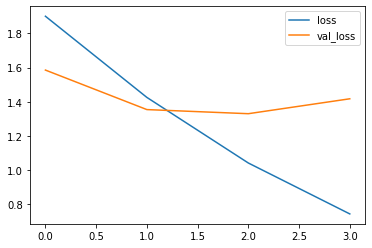

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

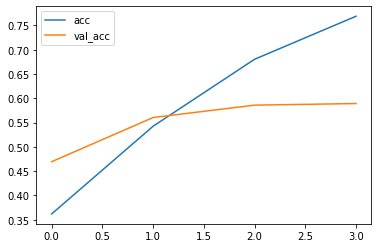

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(Xtest.shape, ytest.shape)

(389, 66) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 2ms/step - loss: 2.3612 - acc: 0.2519
Test Accuracy: 25.192803


##LSTM CNN1 MP1D F D512 D256 D13: 29-40

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(LSTM(50, return_sequences=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())

#CNN + LSTM
#MaxPool1D: pool_size=2: 30
#MaxPool1D: w/o specification: 30

#LSTM + CNN
#MaxPool1D: w/o specification: 33.676094

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 66, 100)           1260900   
                                                                 
 lstm (LSTM)                 (None, 66, 50)            30200     
                                                                 
 conv1d_1 (Conv1D)           (None, 64, 32)            4832      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 16s 44ms/step - loss: 1.6961 - acc: 0.4394 - val_loss: 1.4284 - val_acc: 0.5321
Epoch 2/10
304/304 [==============================] - 14s 45ms/step - loss: 1.2192 - acc: 0.6141 - val_loss: 1.3139 - val_acc: 0.5712
Epoch 3/10
304/304 [==============================] - 14s 45ms/step - loss: 0.8865 - acc: 0.7144 - val_loss: 1.3730 - val_acc: 0.5835


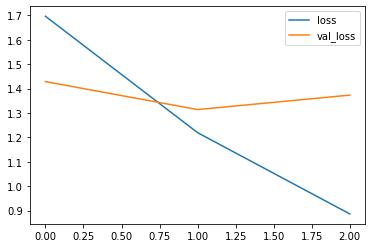

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

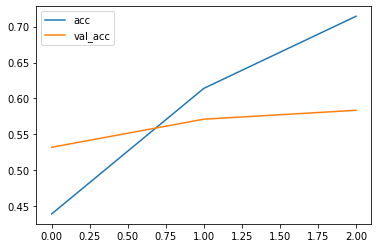

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(ytrain.shape, ytest.shape)

(12150, 13) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 10ms/step - loss: 1.8608 - acc: 0.4087
Test Accuracy: 40.874037


##CNN1 LSTM GMP1D F D512 D256 D13: 30-44

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(LSTM(50, return_sequences=True))

model.add(GlobalMaxPooling1D())
#CNN LSTM GMP1D(w/o spec): 44, 49
#LSTM CNN GMP1D(w/o spec): 38, 47

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 66, 100)           1260900   
                                                                 
 conv1d_2 (Conv1D)           (None, 64, 32)            9632      
                                                                 
 lstm_1 (LSTM)               (None, 64, 50)            16600     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 512)               26112     
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 15s 41ms/step - loss: 1.8040 - acc: 0.3795 - val_loss: 1.5383 - val_acc: 0.4996
Epoch 2/10
304/304 [==============================] - 12s 39ms/step - loss: 1.3708 - acc: 0.5668 - val_loss: 1.4475 - val_acc: 0.5514
Epoch 3/10
304/304 [==============================] - 12s 39ms/step - loss: 1.0569 - acc: 0.6754 - val_loss: 1.3903 - val_acc: 0.5691
Epoch 4/10
304/304 [==============================] - 12s 39ms/step - loss: 0.8255 - acc: 0.7393 - val_loss: 1.5630 - val_acc: 0.5547


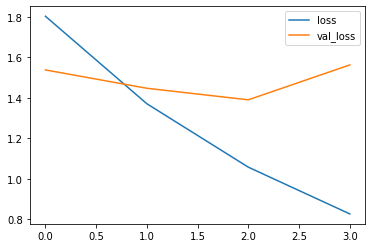

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

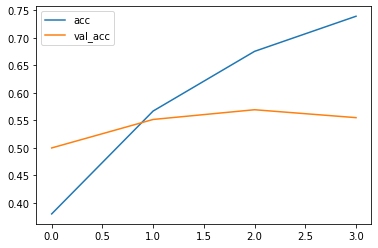

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(ytrain.shape, ytest.shape)

(12150, 13) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 9ms/step - loss: 3.5126 - acc: 0.3033
Test Accuracy: 30.334190


##CNN1,32(3) GMP1D D256 D13: 55-56

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())

#CNN GMP1D(w/o spec): 56.812340
#2CNN GMP1D(w/o spec): 53.470439
#CNN BN GMP1D(w/o spec): 52.956301


model.add(Flatten())
#Flatten(): 56
#w/o Flatten(): 55

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 66, 100)           1260900   
                                                                 
 conv1d_3 (Conv1D)           (None, 64, 32)            9632      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 256)               8448      
                                                                 
 dense_9 (Dense)             (None, 13)                3341      
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Current val_loss =  1.24
history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 2s 12ms/step - loss: 1.9291 - acc: 0.3521 - val_loss: 1.5956 - val_acc: 0.4741
Epoch 2/10
152/152 [==============================] - 2s 11ms/step - loss: 1.3895 - acc: 0.5716 - val_loss: 1.3310 - val_acc: 0.5720
Epoch 3/10
152/152 [==============================] - 2s 11ms/step - loss: 1.0274 - acc: 0.6866 - val_loss: 1.2672 - val_acc: 0.5942
Epoch 4/10
152/152 [==============================] - 2s 11ms/step - loss: 0.7227 - acc: 0.7754 - val_loss: 1.3490 - val_acc: 0.5897


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 2ms/step - loss: 1.4382 - acc: 0.5604
Test Accuracy: 56.041133


##CNN1,128(5) GMP1D D13: 60-64

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 66, 1000)          12609000  
                                                                 
 conv1d_4 (Conv1D)           (None, 62, 128)           640128    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 13)                1677      
                                                                 
Total params: 13,250,805
Trainable params: 13,250,805
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 14s 90ms/step - loss: 1.5844 - acc: 0.4935 - val_loss: 1.2118 - val_acc: 0.6103
Epoch 2/10
152/152 [==============================] - 13s 88ms/step - loss: 0.8901 - acc: 0.7209 - val_loss: 1.0843 - val_acc: 0.6379
Epoch 3/10
152/152 [==============================] - 13s 88ms/step - loss: 0.3994 - acc: 0.8972 - val_loss: 1.1140 - val_acc: 0.6412


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 5ms/step - loss: 1.2131 - acc: 0.6401
Test Accuracy: 64.010280


## CNN1,512&1024,(5,7,10) GMP1D D13: 53-64
the best kernel from [5,7,10] = 5

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf
from keras.layers.pooling import GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
filters = [512, 1024]
kernels = [5, 7, 10]

#Define our model
for filter in filters:
  for kernel in kernels:
    model = Sequential()
    model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
    model.add(Conv1D(filter, kernel , activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(num_classes, activation='softmax'))

    #put early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['acc'],)
    
    #train the model
    history = model.fit(Xtrain, ytrain, 
                      epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                      validation_split=0.2,
                      callbacks=[early_stopping])
  
    #evaludate the model
    loss, acc = model.evaluate(Xtest, ytest)
    print("===========================================")
    print(f"Filter: {filter}")
    print(f"Kernel: {kernel}")
    print('Test Accuracy: %f' % (acc*100)) #79.333335 (CNN kernel = 10), 78 (CNN kernel = 5)
    print("===========================================")

Epoch 1/10
304/304 [==============================] - 39s 125ms/step - loss: 1.3729 - acc: 0.5581 - val_loss: 1.0888 - val_acc: 0.6424
Epoch 2/10
13/13 [==============================] - 0s 12ms/step - loss: 1.2212 - acc: 0.6401
Filter: 512
Kernel: 5
Test Accuracy: 64.010280
Epoch 1/10
304/304 [==============================] - 47s 154ms/step - loss: 1.3788 - acc: 0.5511 - val_loss: 1.1015 - val_acc: 0.6379
Epoch 2/10
13/13 [==============================] - 0s 16ms/step - loss: 1.2504 - acc: 0.5964
Filter: 512
Kernel: 7
Test Accuracy: 59.640104
Epoch 1/10
304/304 [==============================] - 58s 190ms/step - loss: 1.3776 - acc: 0.5549 - val_loss: 1.1815 - val_acc: 0.6115
Epoch 2/10
304/304 [==============================] - 57s 188ms/step - loss: 0.5130 - acc: 0.8430 - val_loss: 1.1379 - val_acc: 0.6436
Epoch 3/10
13/13 [==============================] - 0s 18ms/step - loss: 1.5198 - acc: 0.5681
Filter: 512
Kernel: 10
Test Accuracy: 56.812340
Epoch 1/10
304/304 [================

##3CNN1,(128,128,128),(6,8,10) 3DO0.1 3GMP1D CONCAT D13 CW: 60-63

In [ ]:
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras import Input
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed, concatenate

### patience 1: 60

In [ ]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(128, 6, activation='relu')(embedding1)
drop1 = Dropout(0.1)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(128, 8, activation='relu')(embedding2)
drop2 = Dropout(0.1)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(128, 10, activation='relu')(embedding3)
drop3 = Dropout(0.1)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)

# merge
merged = concatenate([pool1, pool2, pool3])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 66)]         0           []                               
                                                                                                  
 embedding_11 (Embedding)       (None, 66, 1000)     12609000    ['input_1[0][0]']                
                                                                                                  
 embedding_12 (Embedding)       (None, 66, 1000)     12609000    ['input_1[0][0]']                
                                                                                                  
 embedding_13 (Embedding)       (None, 66, 1000)     12609000    ['input_1[0][0]']                
                                                                                              

##3CNN1,(128,256,512),(5) 3DO0.5 3GMP1D CONCAT D13 CW:

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed, concatenate

### patience 1: 63

In [ ]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(128, 5, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(256, 5, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(512, 5, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)

# merge
merged = concatenate([pool1, pool2, pool3])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 66)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 66, 1000)     12609000    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 66, 1000)     12609000    ['input_1[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 66, 1000)     12609000    ['input_1[0][0]']                
                                                                                              

### patience 2: 62

In [ ]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(128, 5, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(256, 5, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(512, 5, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)

# merge
merged = concatenate([pool1, pool2, pool3])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 66)]         0           []                               
                                                                                                  
 embedding_33 (Embedding)       (None, 66, 1000)     12609000    ['input_7[0][0]']                
                                                                                                  
 embedding_34 (Embedding)       (None, 66, 1000)     12609000    ['input_7[0][0]']                
                                                                                                  
 embedding_35 (Embedding)       (None, 66, 1000)     12609000    ['input_7[0][0]']                
                                                                                            

##4CNN1,(128,256,512,1024),(5) 3DO0.5 3GMP1D CONCAT D13 CW

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed, concatenate

### patience 1: 62

In [ ]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(128, 5, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(256, 5, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(512, 5, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)
# channel 4
embedding4 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv4 = Conv1D(1024, 5, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = GlobalMaxPooling1D()(drop4)

# merge
merged = concatenate([pool1, pool2, pool3, pool4])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 66)]         0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 66, 1000)     12609000    ['input_2[0][0]']                
                                                                                                  
 embedding_15 (Embedding)       (None, 66, 1000)     12609000    ['input_2[0][0]']                
                                                                                                  
 embedding_16 (Embedding)       (None, 66, 1000)     12609000    ['input_2[0][0]']                
                                                                                            

### patience 2: 65

In [ ]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(128, 5, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(256, 5, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(512, 5, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)
# channel 4
embedding4 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv4 = Conv1D(1024, 5, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = GlobalMaxPooling1D()(drop4)

# merge
merged = concatenate([pool1, pool2, pool3, pool4])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 66)]         0           []                               
                                                                                                  
 embedding_40 (Embedding)       (None, 66, 1000)     12609000    ['input_9[0][0]']                
                                                                                                  
 embedding_41 (Embedding)       (None, 66, 1000)     12609000    ['input_9[0][0]']                
                                                                                                  
 embedding_42 (Embedding)       (None, 66, 1000)     12609000    ['input_9[0][0]']                
                                                                                            

##4CNN1,(256,512,1024, 2048),(5) 3DO0.5 3GMP1D CONCAT D13 CW:

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed, concatenate

### patience 1: 61

In [ ]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(256, 5, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(512, 5, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(1024, 5, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)
# channel 4
embedding4 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv4 = Conv1D(2048, 5, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = GlobalMaxPooling1D()(drop4)

# merge
merged = concatenate([pool1, pool2, pool3, pool4])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 66)]         0           []                               
                                                                                                  
 embedding_22 (Embedding)       (None, 66, 1000)     12609000    ['input_4[0][0]']                
                                                                                                  
 embedding_23 (Embedding)       (None, 66, 1000)     12609000    ['input_4[0][0]']                
                                                                                                  
 embedding_24 (Embedding)       (None, 66, 1000)     12609000    ['input_4[0][0]']                
                                                                                            

### patience 2: 61

In [ ]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(256, 5, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(512, 5, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(1024, 5, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)
# channel 4
embedding4 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv4 = Conv1D(2048, 5, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = GlobalMaxPooling1D()(drop4)

# merge
merged = concatenate([pool1, pool2, pool3, pool4])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 66)]         0           []                               
                                                                                                  
 embedding_36 (Embedding)       (None, 66, 1000)     12609000    ['input_8[0][0]']                
                                                                                                  
 embedding_37 (Embedding)       (None, 66, 1000)     12609000    ['input_8[0][0]']                
                                                                                                  
 embedding_38 (Embedding)       (None, 66, 1000)     12609000    ['input_8[0][0]']                
                                                                                            

##4CNN2 DO0.5 GMP2D F  D13:60
inspiration: 

https://www.kaggle.com/code/yekenot/2dcnn-textclassifier/notebook

[Text CNN] https://towardsdatascience.com/nlp-learning-series-part-3-attention-cnn-and-what-not-for-text-classification-4313930ed566

In [199]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from keras.models import Model

from keras.callbacks import Callback, EarlyStopping
from keras.preprocessing import text, sequence

from keras.layers.pooling import GlobalMaxPooling2D
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D

In [200]:
train.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...


In [201]:
class F1Evaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            y_pred = (y_pred > threshold).astype(int)
            score = f1_score(self.y_val, y_pred, average='weighted', zero_division=0)
            print("\n F1 Score - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [202]:
#turn pandas.core.series.Series into numpy.ndarray
X_train = train["Text_ws_local"].fillna("fillna").values
y_train = train["Human_CategoryID"].values
X_test = test["Text_ws_local"].fillna("fillna").values
y_test = test["Human_CategoryID"].values

max_features = 40000
maxlen = 70
embed_size = 300

threshold = 0.35

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train) + list(X_test))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)

#multi-class tasks needs one hot for y.
y_train = to_categorical(y_train-1, num_classes)
y_test = to_categorical(y_test-1, num_classes)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

In [203]:
filter_sizes = [1,2,3,5]
num_filters = 42

inp = Input(shape=(maxlen, ))
x = Embedding(max_features, embed_size, trainable=True)(inp)
x = Reshape((maxlen, embed_size, 1))(x)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size),
                              kernel_initializer='he_normal', activation='tanh')(x)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size),
                              kernel_initializer='he_normal', activation='tanh')(x)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), 
                              kernel_initializer='he_normal', activation='tanh')(x)
conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size),
                              kernel_initializer='he_normal', activation='tanh')(x)

drop0 = Dropout(0.5)(conv_0)
drop1 = Dropout(0.5)(conv_1)
drop2 = Dropout(0.5)(conv_2)
drop3 = Dropout(0.5)(conv_0)

maxpool_0 = GlobalMaxPooling2D()(drop0)
maxpool_1 = GlobalMaxPooling2D()(drop1)
maxpool_2 = GlobalMaxPooling2D()(drop2)
maxpool_3 = GlobalMaxPooling2D()(drop3)
    
z = concatenate([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
z = Flatten()(z)
# z = Dropout(0.5)(z) #change to 0.5
    
outp = Dense(num_classes, activation="softmax")(z)

model = Model(inputs=inp, outputs=outp)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [204]:
batch_size = 256
epochs = 100

X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.8,
                                              random_state=233)
F1_Score = F1Evaluation(validation_data=(X_val, y_val), interval=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

hist = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs,
                 validation_data=(X_val, y_val),
                 callbacks=[F1_Score, early_stopping], verbose=2)

loss, acc = model.evaluate(x_test, y_test)
print('Test Accuracy: %f' % (acc*100))

Xtest = X_test
ytest = y_test

Epoch 1/100

 F1 Score - epoch: 1 - score: 0.127497 

38/38 - 6s - loss: 2.0388 - accuracy: 0.3321 - val_loss: 1.8926 - val_accuracy: 0.4658 - 6s/epoch - 146ms/step
Epoch 2/100

 F1 Score - epoch: 2 - score: 0.327942 

38/38 - 4s - loss: 1.5480 - accuracy: 0.5280 - val_loss: 1.6132 - val_accuracy: 0.5642 - 4s/epoch - 111ms/step
Epoch 3/100

 F1 Score - epoch: 3 - score: 0.444344 

38/38 - 4s - loss: 1.2558 - accuracy: 0.6177 - val_loss: 1.4312 - val_accuracy: 0.6095 - 4s/epoch - 111ms/step
Epoch 4/100

 F1 Score - epoch: 4 - score: 0.499448 

38/38 - 4s - loss: 1.0555 - accuracy: 0.6760 - val_loss: 1.3510 - val_accuracy: 0.6210 - 4s/epoch - 111ms/step
Epoch 5/100

 F1 Score - epoch: 5 - score: 0.517545 

38/38 - 4s - loss: 0.8956 - accuracy: 0.7222 - val_loss: 1.2958 - val_accuracy: 0.6259 - 4s/epoch - 111ms/step
Epoch 6/100

 F1 Score - epoch: 6 - score: 0.538169 

38/38 - 4s - loss: 0.7472 - accuracy: 0.7719 - val_loss: 1.2635 - val_accuracy: 0.6395 - 4s/epoch - 111ms/step
Epoch 7/10

##4CNN2 MP2D F DO0.5 D13 (from kaggle): 62
inspiration: https://www.kaggle.com/code/yekenot/2dcnn-textclassifier/notebook

In [261]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from keras.models import Model

from keras.callbacks import Callback, EarlyStopping
from keras.preprocessing import text, sequence

from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D

In [262]:
train.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...


In [267]:
class F1Evaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            y_pred = (y_pred > threshold).astype(int)
            score = f1_score(self.y_val, y_pred, average='weighted', zero_division=0)
            print("\n F1 Score - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [268]:
#turn pandas.core.series.Series into numpy.ndarray
X_train = train["Text_ws_local"].fillna("fillna").values
y_train = train["Human_CategoryID"].values
X_test = test["Text_ws_local"].fillna("fillna").values
y_test = test["Human_CategoryID"].values

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train) + list(X_test))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)

#multi-class tasks needs one hot for y.
y_train = to_categorical(y_train-1, num_classes)
y_test = to_categorical(y_test-1, num_classes)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

In [269]:
max_features = vocab_size
maxlen = max_length
embed_size = 1000
threshold = 0.35

filter_sizes = [1,2,3,5]
num_filters = 42

inp = Input(shape=(maxlen, ))
x = Embedding(max_features, embed_size, trainable=True)(inp)
x = Reshape((maxlen, embed_size, 1))(x)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size),
                              kernel_initializer='he_normal', activation='relu')(x)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size),
                              kernel_initializer='he_normal', activation='relu')(x)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), 
                              kernel_initializer='he_normal', activation='relu')(x)
conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size),
                              kernel_initializer='he_normal', activation='relu')(x)

maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
    
z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
z = Flatten()(z)
z = Dropout(0.5)(z)
    
outp = Dense(num_classes, activation="softmax")(z)

model = Model(inputs=inp, outputs=outp)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [270]:
batch_size = 256
epochs = 100

X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.7,
                                              random_state=233)
F1_Score = F1Evaluation(validation_data=(X_val, y_val), interval=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

hist = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs,
                 validation_data=(X_val, y_val),
                 callbacks=[F1_Score, early_stopping], verbose=2)

loss, acc = model.evaluate(x_test, y_test)
print('Test Accuracy: %f' % (acc*100))

Epoch 1/100

 F1 Score - epoch: 1 - score: 0.338603 

34/34 - 11s - loss: 2.0054 - accuracy: 0.3459 - val_loss: 1.6590 - val_accuracy: 0.4615 - 11s/epoch - 318ms/step
Epoch 2/100

 F1 Score - epoch: 2 - score: 0.470095 

34/34 - 10s - loss: 1.5249 - accuracy: 0.5183 - val_loss: 1.4127 - val_accuracy: 0.5542 - 10s/epoch - 283ms/step
Epoch 3/100

 F1 Score - epoch: 3 - score: 0.538072 

34/34 - 10s - loss: 1.2604 - accuracy: 0.6099 - val_loss: 1.2702 - val_accuracy: 0.5984 - 10s/epoch - 285ms/step
Epoch 4/100

 F1 Score - epoch: 4 - score: 0.561444 

34/34 - 10s - loss: 1.0614 - accuracy: 0.6728 - val_loss: 1.2036 - val_accuracy: 0.6148 - 10s/epoch - 289ms/step
Epoch 5/100

 F1 Score - epoch: 5 - score: 0.585553 

34/34 - 10s - loss: 0.8706 - accuracy: 0.7336 - val_loss: 1.1472 - val_accuracy: 0.6274 - 10s/epoch - 280ms/step
Epoch 6/100

 F1 Score - epoch: 6 - score: 0.590078 

34/34 - 10s - loss: 0.7218 - accuracy: 0.7834 - val_loss: 1.1284 - val_accuracy: 0.6316 - 10s/epoch - 280ms/ste

##4CNN2 MP2D F DO0.5 D13: 68
inspiration: 

https://www.kaggle.com/code/yekenot/2dcnn-textclassifier/notebook

[Text CNN] https://towardsdatascience.com/nlp-learning-series-part-3-attention-cnn-and-what-not-for-text-classification-4313930ed566

In [367]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from keras.models import Model

from keras.callbacks import Callback, EarlyStopping
from keras.preprocessing import text, sequence

from keras.layers.pooling import GlobalMaxPooling2D
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D

In [368]:
train.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...


In [369]:
class F1Evaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            y_pred = (y_pred > threshold).astype(int)
            score = f1_score(self.y_val, y_pred, average='weighted', zero_division=0)
            print("\n F1 Score - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [370]:
#turn pandas.core.series.Series into numpy.ndarray
X_train = train["Text_ws_local"].fillna("fillna").values
y_train = train["Human_CategoryID"].values
X_test = test["Text_ws_local"].fillna("fillna").values 
y_test = test["Human_CategoryID"].values

max_features = 40000
maxlen = 70
embed_size = 400 #ES

threshold = 0.35

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train) + list(X_test))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)

#multi-class tasks needs one hot for y.
y_train = to_categorical(y_train-1, num_classes)
y_test = to_categorical(y_test-1, num_classes)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

In [371]:
filter_sizes = [2,3,5,10]
num_filters = 256 #NF

### filter_sizes = [3,5,8,10]
#NF256 ES600 = 0.67

### filter_sizes = [2,3,7,10]
#NF256 ES600 = 0.66

### filter_sizes = [2,3,5,10]
#NF256 ES400 = 0.68
#NF256 ES600 = 0.66 - 0.68
#NF256 ES800 = 0.65
#NF256 ES1000 = 0.67

#NF512 ES600 = 0.67, 
#NF1024 ES600 = 0.68

inp = Input(shape=(maxlen, ))
x = Embedding(max_features, embed_size, trainable=True)(inp)
x = Reshape((maxlen, embed_size, 1))(x)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size),
                              kernel_initializer='he_normal', activation='relu')(x)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size),
                              kernel_initializer='he_normal', activation='relu')(x)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), 
                              kernel_initializer='he_normal', activation='relu')(x)
conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size),
                              kernel_initializer='he_normal', activation='relu')(x)

maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
    
z = concatenate([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
z = Flatten()(z)
z = Dropout(0.5)(z)
    
outp = Dense(num_classes, activation="softmax")(z)

model = Model(inputs=inp, outputs=outp)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [372]:
batch_size = 256 #try 128
epochs = 100

X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, train_size=0.8,
                                              random_state=233)
F1_Score = F1Evaluation(validation_data=(X_val, y_val), interval=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

hist = model.fit(X_tra, y_tra, batch_size=batch_size, epochs=epochs,
                 validation_data=(X_val, y_val),
                 callbacks=[F1_Score, early_stopping], verbose=2, class_weight=class_weights)

loss, acc = model.evaluate(x_test, y_test)
print('Test Accuracy: %f' % (acc*100))

Xtest = x_test
ytest = y_test
history = hist

Epoch 1/100

 F1 Score - epoch: 1 - score: 0.000000 

38/38 - 16s - loss: 2.5101 - acc: 0.1455 - val_loss: 2.3441 - val_acc: 0.3621 - 16s/epoch - 434ms/step
Epoch 2/100

 F1 Score - epoch: 2 - score: 0.225526 

38/38 - 15s - loss: 2.0154 - acc: 0.4216 - val_loss: 1.9312 - val_acc: 0.4251 - 15s/epoch - 398ms/step
Epoch 3/100

 F1 Score - epoch: 3 - score: 0.390895 

38/38 - 15s - loss: 1.4368 - acc: 0.5220 - val_loss: 1.5628 - val_acc: 0.5156 - 15s/epoch - 400ms/step
Epoch 4/100

 F1 Score - epoch: 4 - score: 0.499233 

38/38 - 15s - loss: 0.9586 - acc: 0.6187 - val_loss: 1.3159 - val_acc: 0.5621 - 15s/epoch - 400ms/step
Epoch 5/100

 F1 Score - epoch: 5 - score: 0.588889 

38/38 - 15s - loss: 0.6376 - acc: 0.7184 - val_loss: 1.1785 - val_acc: 0.6082 - 15s/epoch - 401ms/step
Epoch 6/100

 F1 Score - epoch: 6 - score: 0.628783 

38/38 - 15s - loss: 0.4289 - acc: 0.7931 - val_loss: 1.0794 - val_acc: 0.6416 - 15s/epoch - 401ms/step
Epoch 7/100

 F1 Score - epoch: 7 - score: 0.649409 

38/3

#Plot Confusion and Classification Report

In [373]:
#prediction
y_pred = model.predict(Xtest)

#Change one hot answer to be single digit as follows 
#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_labels_ypred = np.argmax(y_pred, axis=1)
rounded_labels_ytest = np.argmax(ytest,axis=1)

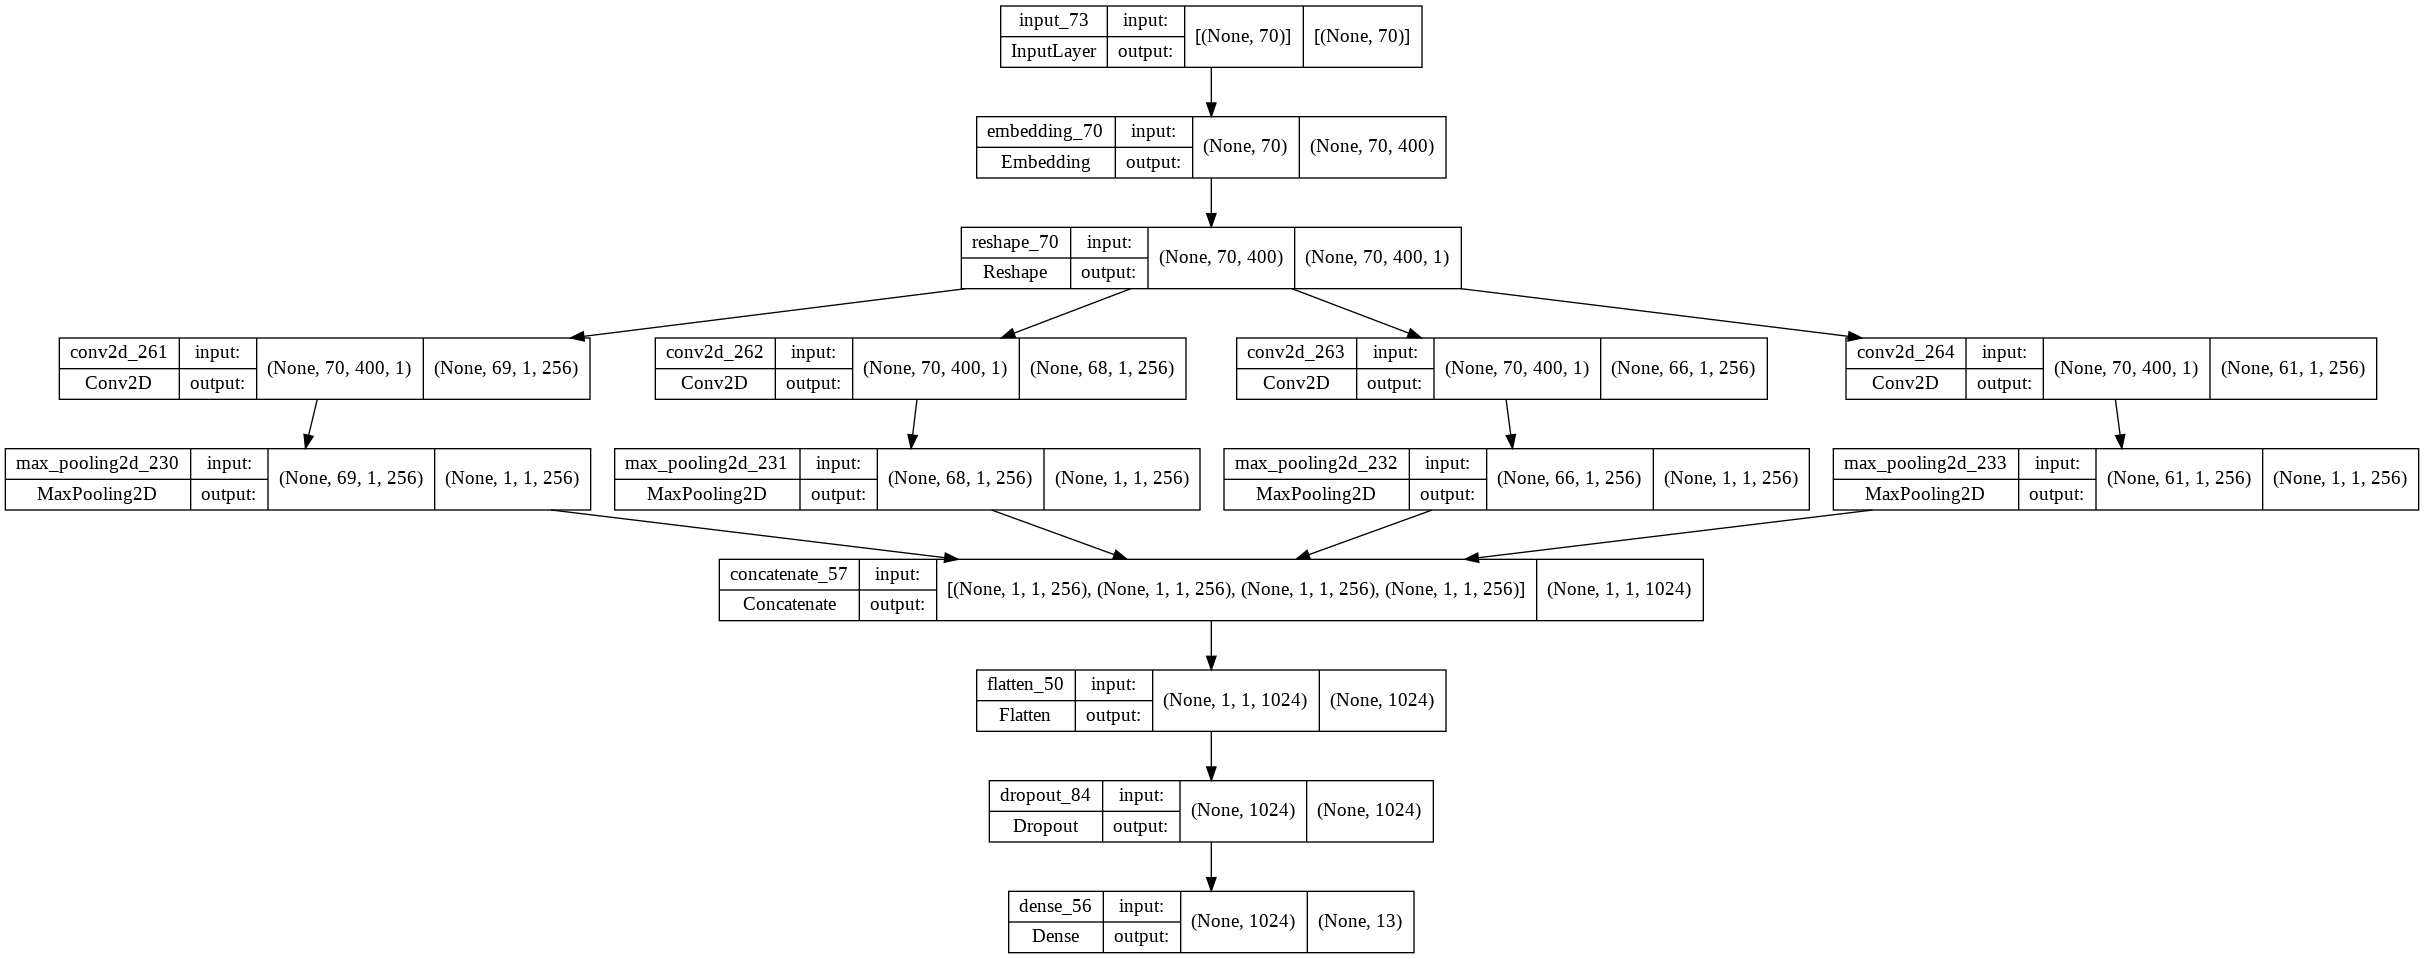

In [374]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# from google.colab import files
# files.download('model_plot.png')

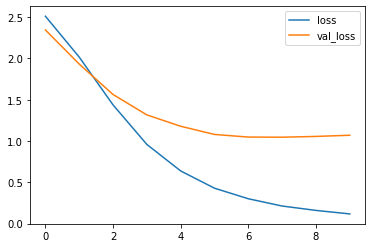

In [375]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

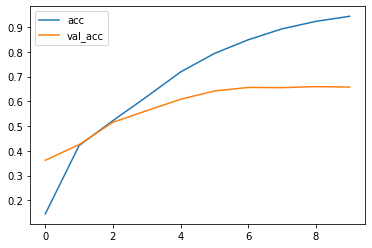

In [376]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [377]:
#Find dict of label ids and names.
if train['Human_CategoryID'].nunique() < test['Human_CategoryID'].nunique():
  print('train_unique_classes')
  classes_with_id_dict = {id-1: labels for id, labels in zip(train['Human_CategoryID'], train['Human_Category'])}
  print(len(classes_with_id_dict))
else:
  print('test_unique_classes')
  classes_with_id_dict = {id-1: labels for id, labels in zip(test['Human_CategoryID'], test['Human_Category'])}
  print(len(classes_with_id_dict))

classes_with_id_dict

test_unique_classes
12


{0: 'Accessibility',
 2: 'Company Brand',
 3: 'Staff Quality',
 4: 'Timing',
 5: 'Product and Service, Benefit',
 6: 'Product and Service, System',
 7: 'Product and Service, Usage and Condition',
 8: 'Product and Service, Convenience',
 9: 'Product and Service, Variety',
 10: 'Product and Service, Decision',
 11: 'Security',
 12: 'No Category'}

In [378]:
#get an labels array in the conseuctive order based on id number.
train_unique_classes = train['Human_CategoryID'].nunique()
test_unique_classes = test['Human_CategoryID'].nunique()

#find the label total
if train['Human_CategoryID'].nunique() > test['Human_CategoryID'].nunique():
  print('test_unique_classes')
  classes_with_id = test_unique_classes
else:
  print('train_unique_classes')
  classes_with_id = train_unique_classes

#convert a dict to an array
classes_array = ["" for x in range(classes_with_id+1)]

for id, label in classes_with_id_dict.items():
  classes_array[id] = label

#delete empty string for classification report
classes_array = [label for label in classes_array if label != ""]
classes_array
print(len(classes_array))

test_unique_classes
12


In [379]:
from sklearn.metrics import classification_report

print(classification_report(rounded_labels_ytest, rounded_labels_ypred, target_names=classes_array, zero_division=0))

                                          precision    recall  f1-score   support

                           Accessibility       0.83      0.71      0.77         7
                           Company Brand       0.83      0.42      0.56        12
                           Staff Quality       0.43      0.71      0.53        17
                                  Timing       0.72      0.64      0.68        28
            Product and Service, Benefit       0.60      0.66      0.63        32
             Product and Service, System       0.79      0.92      0.85        84
Product and Service, Usage and Condition       0.73      0.72      0.72        92
        Product and Service, Convenience       1.00      0.27      0.43        11
            Product and Service, Variety       0.50      0.33      0.40        12
           Product and Service, Decision       0.50      0.50      0.50        10
                                Security       1.00      0.67      0.80         3
               

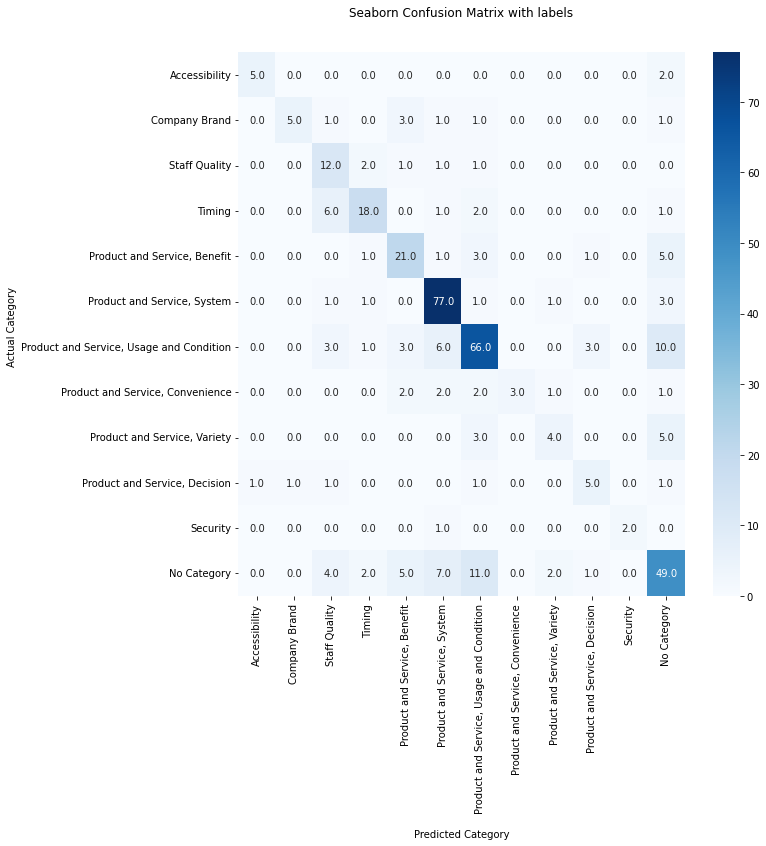

In [380]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(rounded_labels_ytest, rounded_labels_ypred)

fig, ax = plt.subplots(figsize=(10,10))    
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax, fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes_array, rotation=90)
ax.yaxis.set_ticklabels(classes_array, rotation=0)

## Display the visualization of the Confusion Matrix.
plt.show()

figure = ax.get_figure()    
figure.savefig("cf_matrix.png", pad_inches= 12, dpi=400)

#Post Analysis

In [ ]:
!pip install lime
!pip install eli5

In [ ]:
import eli5
from eli5.lime import TextExplainer

#Get configs

In [ ]:
model.get_config()

{'input_layers': [['input_9', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 66),
    'dtype': 'float32',
    'name': 'input_9',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_9'},
  {'class_name': 'Embedding',
   'config': {'activity_regularizer': None,
    'batch_input_shape': (None, None),
    'dtype': 'float32',
    'embeddings_constraint': None,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'input_dim': 12609,
    'input_length': None,
    'mask_zero': False,
    'name': 'embedding_40',
    'output_dim': 1000,
    'trainable': True},
   'inbound_nodes': [[['input_9', 0, 0, {}]]],
   'name': 'embedding_40'},
  {'class_name': 'Embedding',
   'config': {'activity_regularizer': None,
    'batch_input_shape': (None, None),
    'dtype': 'float32',
    'embeddings_constraint': None,
    '

In [ ]:
model.loss

'categorical_crossentropy'

In [ ]:
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [ ]:
model.history.params

{'epochs': 1, 'steps': 13, 'verbose': 0}